# Data Cleaning

Data cleaning is the process of detecting and removing errors and inconsistencies from the data to improve its quality. Improper data cleaning process can lead to errors, faulty analysis, distortion in dataset and eventually incompatible datasets for machine learning purposes. There is no absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. My data cleaning process includes:

* Check the data types
* Check for duplicates - Primary key ('tweets.id')
* Check missing values
* Make text all lower case
* Remove links and images
* Remove hashtags
* Remove @ mentions
* Remove emojis
* Remove stop words
* Remove punctuation
* Get rid of stuff like "what's" and making it "what is'
* Stemming / lemmatization




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -qqq ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 849.3 kB/s eta 0:00:00


In [ ]:
## Import required libraries

## warnings
import warnings
warnings.filterwarnings("ignore")

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import nltk
import re
import ftfy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

## for opening, manipulating, and saving many different image file f
from PIL import Image

## WordCloud - Python library for creating image wordclouds
from wordcloud import WordCloud
from nltk import pos_tag ## For Parts of Speech tagging
import random ## generating random numbers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load the datasets

In [ ]:
depressive_tweets_df = pd.read_csv("/content/drive/MyDrive/MLHops/Depression_Tweets/data/depressive_tweets.csv")
random_tweets_df = pd.read_csv("/content/drive/MyDrive/MLHops/Depression_Tweets/data/random_tweets.csv",
                               encoding = "ISO-8859-1", usecols = range(0,4), nrows = 40000)

In [ ]:
depressive_tweets_df

,Unnamed: 0,tweet.id,created_at,text,location,retweet,favorite
0,0,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
1,1,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0
2,2,1447807717859491842,2021-10-12 06:13:53,I feel a little hopeless. Anyone else? #hopele...,NaN,0,0
3,3,1448076026219692033,2021-10-13 00:00:03,"Which is more healthy? Hope, or hopelessness? ...","Denver, CO",0,0
4,4,1448382047375040513,2021-10-13 20:16:04,So someone tell me how do I get over #HOPELESS...,Portland Or .,0,2
...,...,...,...,...,...,...,...
24142,24142,1459521498842992642,2021-11-13 14:00:16,Just got banned from a server F #sad,Jakarta Capital Region,0,1
24143,24143,1459521611997003777,2021-11-13 14:00:43,I literally cried during my exam and the cam i...,بيت أمك,0,0
24144,24144,1459524263946326017,2021-11-13 14:11:15,No one can be happy with a guy like me. That's...,"Varanasi, Uttar Pradesh, India",0,0
24145,24145,1459530315437785095,2021-11-13 14:35:18,arrived at my house but Am I Home? #deep #sad ...,they19sea,1,3


In [ ]:
random_tweets_df

,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
39995,40007,0,Sentiment140,"@AndreaKidd Ouchies, I hope it isn't anything ..."
39996,40008,1,Sentiment140,@AndreaKobayashi It's the best cafe in Asakusa...
39997,40009,1,Sentiment140,@AndreaKoeln heeey! tonight is the night! no s...
39998,40010,1,Sentiment140,@AmandaFClark it is when you add the hammock


In [ ]:
## Slicing the random tweets to have sentiment == 1
new_rand_df = random_tweets_df[random_tweets_df.Sentiment == 1]
new_rand_df.reset_index(inplace=True)

In [ ]:
new_rand_df.shape

(20952, 5)

In [ ]:
new_rand_df.head()

,index,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,2,3,1,Sentiment140,omg its already 7:30 :O
1,6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
2,8,9,1,Sentiment140,handed in my uniform today . i miss you ...
3,9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)
4,11,12,1,Sentiment140,thanks to all the haters up in my face a...


20952 random tweets with sentiment == 1

## Data Cleaning-Processing:

In [ ]:
print(depressive_tweets_df.shape)
print(new_rand_df.shape)

(24147, 7)
(20952, 5)


In [ ]:
## Check the data type of each column
depressive_tweets_df.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
Unnamed: 0,int64
tweet.id,int64
created_at,object
text,object
location,object
retweet,int64
favorite,int64


In [ ]:
## Check the data type of each column
new_rand_df.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
index,int64
ï»¿ItemID,int64
Sentiment,int64
SentimentSource,object
SentimentText,object


In [ ]:
## Drop unnecessary columns
depressive_tweets_df.drop(columns=['Unnamed: 0'], inplace=True)
new_rand_df.drop(columns=['ï»¿ItemID', 'index','Sentiment', 'SentimentSource'], inplace=True)

Since we are mostly dealing with the tweets in our datasets, it is not necessary to change the data types at this stage.

In [ ]:
## Finding unique values in each column
for col in depressive_tweets_df:
    print("There are ", len(depressive_tweets_df[col].unique()), "unique values in ", col)

There are  18190 unique values in  tweet.id
There are  18071 unique values in  created_at
There are  17107 unique values in  text
There are  4648 unique values in  location
There are  74 unique values in  retweet
There are  159 unique values in  favorite


By considering **tweet.id** as our primary key, we have **18190** unique tweets, so we need to get rid of the duplicates.

In [ ]:
## Finding unique values in each column
for col in new_rand_df:
    print("There are ", len(new_rand_df[col].unique()), "unique values in ", col)

There are  20952 unique values in  SentimentText


No duplicates in random tweets dataset

In [ ]:
## drop duplicate values in tweet.id
depressive_tweets_df.drop_duplicates(subset=['tweet.id'], inplace=True)

In [ ]:
depressive_tweets_df.reset_index(inplace=True)

In [ ]:
depressive_tweets_df.shape

(18190, 7)

In [ ]:
## Find the number of Null values in each columns
depressive_tweets_df.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
index,0
tweet.id,0
created_at,0
text,0
location,6384
retweet,0
favorite,0


There are **6384** Null values in the **location** columns but since location will not be used in our analysis or as a feature in our model, we don't need to replace them.

In [ ]:
## Find the number of Null values in each columns
new_rand_df.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
SentimentText,0


No Null values in random tweets dataset.

In [ ]:
## Drop all the columns except index, tweet.id and text
new_dep_df = depressive_tweets_df[['text']]

In [ ]:
## Add label to both datasets (0 is non-depressive and 1 is depressive)
new_dep_df['label'] = pd.Series([1 for x in range(len(new_dep_df.index))])
new_rand_df['label'] = pd.Series([0 for x in range(len(new_rand_df.index))])

In [ ]:
new_dep_df

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1
...,...,...
18185,Just got banned from a server F #sad,1
18186,I literally cried during my exam and the cam i...,1
18187,No one can be happy with a guy like me. That's...,1
18188,arrived at my house but Am I Home? #deep #sad ...,1


In [ ]:
## Change the column name to be aligned with depressive dataset
new_rand_df.rename(columns={'SentimentText': 'text'}, inplace=True)

In [ ]:
new_rand_df

,text,label
0,omg its already 7:30 :O,0
1,Juuuuuuuuuuuuuuuuussssst Chillin!!,0
2,handed in my uniform today . i miss you ...,0
3,hmmmm.... i wonder how she my number @-),0
4,thanks to all the haters up in my face a...,0
...,...,...
20947,"@andreaj27 well, cheers. i have a glass of wat...",0
20948,@AndreaJo84 Is that right? You're over in Palm...,0
20949,@AndreaKobayashi It's the best cafe in Asakusa...,0
20950,@AndreaKoeln heeey! tonight is the night! no s...,0


In [ ]:
## Combine two dataframes together
df_all = pd.concat([new_dep_df, new_rand_df], ignore_index=True)

In [ ]:
df_all

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1
...,...,...
39137,"@andreaj27 well, cheers. i have a glass of wat...",0
39138,@AndreaJo84 Is that right? You're over in Palm...,0
39139,@AndreaKobayashi It's the best cafe in Asakusa...,0
39140,@AndreaKoeln heeey! tonight is the night! no s...,0


In [ ]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
## Function to perform stepwise cleaning process
def tweets_cleaner(tweets):
  cleaned_tweets = []
  for tweet in tweets:
    tweet = tweet.lower() #lowercase

    # if url links then don't append to avoid news articles
    # also check tweet length, save those > 5
    if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 5:

      #remove hashtag, @mention, emoji and image URLs
      tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())

      #fix weirdly encoded texts
      tweet = ftfy.fix_text(tweet)

      #expand contraction
      tweet = expandContractions(tweet)


      #remove punctuation
      tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

      #stop words and lemmatization
      stop_words = set(stopwords.words('english'))
      word_tokens = nltk.word_tokenize(tweet)

      lemmatizer=WordNetLemmatizer()
      filtered_sentence = [lemmatizer.lemmatize(word) for word in word_tokens if not word in stop_words]
      # back to string from list
      tweet = ' '.join(filtered_sentence) # join words with a space in between them

      cleaned_tweets.append(tweet)

  return cleaned_tweets


## Data Analysis:

In [ ]:
## distribution of classes for prediction
def create_distribution(dataFile):
  return sns.countplot(x='label', data=dataFile, palette='hls')

<Axes: xlabel='label', ylabel='count'>

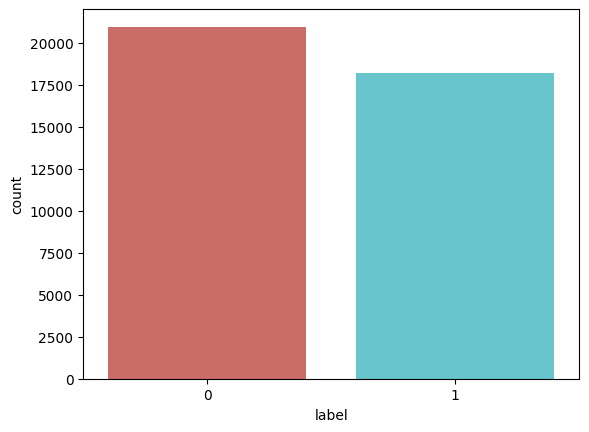

In [ ]:
create_distribution(df_all)

Depressive and random (Non-depressive) tweets are almost evenly distributed.

**Finding distribution of tweet lengths**

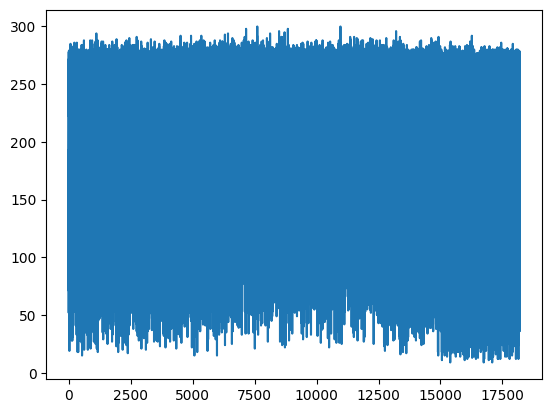

In [ ]:
dep_line_lengths = [len(statement) for statement in new_dep_df['text']]
plt.plot(dep_line_lengths)
plt.show()

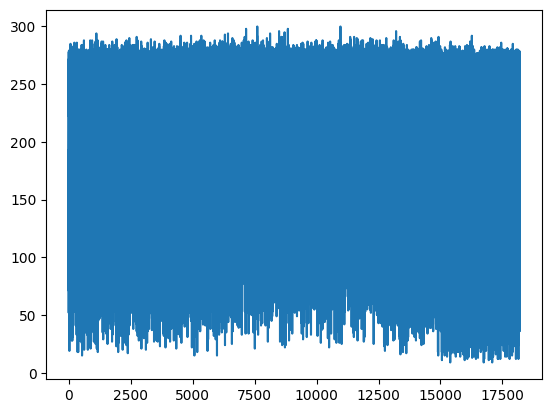

In [ ]:
rand_line_lengths = [len(statement) for statement in new_rand_df['text']]
plt.plot(dep_line_lengths)
plt.show()

From the distributions above, it is clear that there is no outliers in our depressive and random datasets.

## Cleaning combined dataset and save it

In [ ]:
tweets_arr = [x for x in df_all['text']]

In [ ]:
corpus = tweets_cleaner(tweets_arr)

In [ ]:
corpus[:10]

['open discussion transfer portal nil become obsolete organization governing body',
 'plenty thing changing life life around one thing change',
 'feel little hopeless anyone else',
 'healthy hope hopelessness',
 'someone tell get live world surrounded people help u much better son inability care would likely give hopelessness darkness',
 'parent deserves experience indian legal system',
 'also look lot like feel like worse place sometimes',
 'glad tackling huge professional shortage facing saddened really living post pandemic world palpable every level department system',
 'know someone depressed please resolve never ask straightforward response bad situation depression like weather try understand blackness lethargy loneliness going',
 'find every hidden grow calm way go beyond mere others']

In [ ]:
## Adding clean tweets as a new column
df_all['clean_text'] = corpus

We have to remove those rows with tweets that has been completely deleted in the cleaning process.

In [ ]:
# replace field that's entirely space (or empty) with NaN
df_all.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
df_all[df_all['clean_text'].isnull()]

,text,label,clean_text
67,"You are there for them, but they are not there...",1,NaN
881,Why me? \n\n#depression #depressed #sad #cry #...,1,NaN
1142,that’s IT! i’m #depressed,1,NaN
2037,When your #anxiety has #anxiety 😖,1,NaN
5073,I have #anxiety,1,NaN
...,...,...,...
38624,@amyserrata i can do that,0,NaN
38730,@anaggh,0,NaN
38947,@ancesmulles so. when?,0,NaN
38949,@AnchMorpork ?? ??? ??????? ???????????? &quot...,0,NaN


In [ ]:
## Deleting the rows with nan
df_all.dropna(subset=['clean_text'], inplace=True)

In [ ]:
## Double_check for nan
df_all[df_all['clean_text'].isnull()]

,text,label,clean_text


In [ ]:
## Save cleaned_dataset
df_all.to_csv('/content/drive/MyDrive/MLHops/Depression_Tweets/data/processed_data.csv',
              sep='\t', encoding='utf-8',index=False)